In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor

%matplotlib inline

In [2]:
data = pd.read_csv(r'../data/all_wells.csv')
data.fillna(data.mean(), inplace=True)
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),...,water 3,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12
0,6300.0,53700.0,0.05,0.009,0.305,1.058935e+07,0.118212,0.881788,870417.418369,393.486280,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13
1,6401.0,53700.0,0.03,0.004,0.305,1.059206e+07,0.117850,0.882150,763209.659862,301.003964,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13
2,6502.0,53700.0,0.05,0.008,0.305,1.059487e+07,0.117492,0.882508,763209.659862,301.003964,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13
3,6602.0,53700.0,0.03,0.003,0.305,1.059776e+07,0.117138,0.882862,860887.258744,278.775058,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13
4,6703.0,53700.0,0.03,0.003,0.304,1.060074e+07,0.116788,0.883212,763209.659862,301.003964,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13


In [3]:
data['OIP'] = data['porosity'] * data['oil saturation']
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),...,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12,OIP
0,6300.0,53700.0,0.05,0.009,0.305,1.058935e+07,0.118212,0.881788,870417.418369,393.486280,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.044089
1,6401.0,53700.0,0.03,0.004,0.305,1.059206e+07,0.117850,0.882150,763209.659862,301.003964,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.026464
2,6502.0,53700.0,0.05,0.008,0.305,1.059487e+07,0.117492,0.882508,763209.659862,301.003964,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.044125
3,6602.0,53700.0,0.03,0.003,0.305,1.059776e+07,0.117138,0.882862,860887.258744,278.775058,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.026486
4,6703.0,53700.0,0.03,0.003,0.304,1.060074e+07,0.116788,0.883212,763209.659862,301.003964,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.026496


In [29]:
x = data[['easting', 'northing']]

In [37]:
porosity_model = model_porosity()
oip_model = model_oip()

Score 0.6298051653162068
Score 0.6277784194693892


In [22]:
def predict_and_plot(model, precision=2000):
    easting = x['easting']
    northing = x['northing']
    grid = np.mgrid[easting.min():easting.max():precision, northing.min():northing.max():precision]
    grid = grid.reshape((2, -1))

    input_array = []

    for i in range(len(grid[0])):
        input_array.append((grid[0][i], grid[1][i]))

    predictions = model.predict(input_array)

    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.scatter(grid[0], grid[1], c=predictions)
    plt.colorbar()

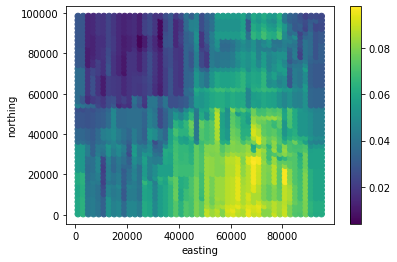

In [38]:
predict_and_plot(porosity_model)

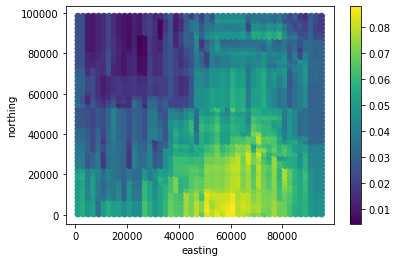

In [39]:
predict_and_plot(oip_model)

In [35]:
def model_porosity():
    train_x, test_x, train_y, test_y = train_test_split(x, data['porosity'], test_size=0.8, random_state=0)
    model = BaggingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Score', model.score(test_x, test_y))
    
    return model

In [36]:
def model_oip():
    train_x, test_x, train_y, test_y = train_test_split(x, data['OIP'], test_size=0.8, random_state=0)
    model = BaggingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Score', model.score(test_x, test_y))
    
    return model